# world-population

Use the "Run" button to execute the code.

In [87]:
!pip install jovian --upgrade --quiet

In [88]:
import jovian

In [89]:
# Execute this to save new versions of the notebook
jovian.commit(project="world-population")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "evanmarie/world-population" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/evanmarie/world-population


'https://jovian.ai/evanmarie/world-population'

In [4]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

In [5]:
!pip install jovian opendatasets --upgrade --quiet

In [6]:
import opendatasets as od

In [7]:
dataset_url = 'https://www.kaggle.com/datasets/evanmariecarr/world-population/download?datasetVersionNumber=1'


In [8]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading world-population.zip to ./world-population


100%|██████████| 15.7k/15.7k [00:00<00:00, 461kB/s]

In [9]:
my_raw_data_df = pd.read_csv('./world-population/world_population.csv')

In [10]:
selected_columns = ['Rank', 'Country', 'Capital', 'Continent', '2022 Population', 'Area (km²)',
                    'Density (per km²)', 'Growth Rate', 'World Population Percentage']

world_population_df = my_raw_data_df[selected_columns]


In [11]:
# Make all column names lowercase and replace spaces with underscores
world_population_df.columns = [column.lower().replace(' ', '_') for column in world_population_df.columns]

In [12]:
# Get the ten countries with the highest population in 2022
top_ten_df = world_population_df.sort_values(by='2022_population', ascending=False).head(10)
top_ten_df.sample(10)


,rank,country,capital,continent,2022_population,area_(km²),density_(per_km²),growth_rate,world_population_percentage
156,5,Pakistan,Islamabad,Asia,235824862,881912,267.4018,1.0191,2.96
221,3,United States,"Washington, D.C.",North America,338289857,9372610,36.0935,1.0038,4.24
41,1,China,Beijing,Asia,1425887337,9706961,146.8933,1.0000,17.88
131,10,Mexico,Mexico City,North America,127504125,1964375,64.9082,1.0063,1.60
16,8,Bangladesh,Dhaka,Asia,171186372,147570,1160.0350,1.0108,2.15
27,7,Brazil,Brasilia,South America,215313498,8515767,25.2841,1.0046,2.70
92,2,India,New Delhi,Asia,1417173173,3287590,431.0675,1.0068,17.77
171,9,Russia,Moscow,Europe,144713314,17098242,8.4636,0.9973,1.81
149,6,Nigeria,Abuja,Africa,218541212,923768,236.5759,1.0241,2.74
93,4,Indonesia,Jakarta,Asia,275501339,1904569,144.6529,1.0064,3.45


In [13]:
# Get the ten countries with the lowest population in 2022
bottom_ten_df = world_population_df.sort_values(by='2022_population', ascending=True).head(10)
bottom_ten_df.sample(10)


,rank,country,capital,continent,2022_population,area_(km²),density_(per_km²),growth_rate,world_population_percentage
142,225,Nauru,Yaren,Oceania,12668,21,603.2381,1.0125,0.0
216,227,Tuvalu,Funafuti,Oceania,11312,26,435.0769,1.0096,0.0
150,232,Niue,Alofi,Oceania,1934,260,7.4385,0.9985,0.0
209,233,Tokelau,Nukunonu,Oceania,1871,12,155.9167,1.0119,0.0
226,234,Vatican City,Vatican City,Europe,510,1,510.0000,0.9980,0.0
64,231,Falkland Islands,Stanley,South America,3780,12173,0.3105,1.0043,0.0
173,228,Saint Barthelemy,Gustavia,North America,10967,21,522.2381,1.0098,0.0
177,229,Saint Pierre and Miquelon,Saint-Pierre,North America,5862,242,24.2231,0.9964,0.0
229,226,Wallis and Futuna,Mata-Utu,Oceania,11572,142,81.4930,0.9953,0.0
137,230,Montserrat,Brades,North America,4390,102,43.0392,0.9939,0.0


In [14]:
# See the counts of values in a given column:
world_population_df['continent'].value_counts()

Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: continent, dtype: int64

In [15]:
# compute the population density per km^2 of the entire continents
# and store the results in a dictionary
continent_population_density = {
    continent: world_population_df[world_population_df['continent'] == continent]['density_(per_km²)'].mean()
    for continent in world_population_df['continent'].unique()
}

for k, v in continent_population_density.items():
    print(f"The continent, {k}, has a population density of {v:.2f}.")
    

The continent, Asia, has a population density of 1025.02.
The continent, Europe, has a population density of 663.32.
The continent, Africa, has a population density of 125.05.
The continent, Oceania, has a population density of 132.54.
The continent, North America, has a population density of 272.76.
The continent, South America, has a population density of 20.97.


In [61]:
# print the countries in europe, their names, and their population density

europe_countries_pop_dense = {}

for index, row in world_population_df[world_population_df['continent'] == 'Europe'].iterrows():
    europe_countries_pop_dense[row['country']] = row['density_(per_km²)']

    print(row['country'], "with a density of" , row['density_(per_km²)'], "people per km^2.\n")



KeyError: 'density_(per_km²)'

In [17]:
continents_list = world_population_df['continent'].value_counts()

In [18]:
print("This is the list of continents and their counts: \n", continents_list, "\n")

This is the list of continents and their counts: 
 Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: continent, dtype: int64 



### Creating graphs for the population density across the continents and across the countries of Europe

In [19]:
# Create a dataframe from the dictionary
continent_population_density_df = pd.DataFrame.from_dict(continent_population_density, orient='index', columns=['population_density'])
europe_countries_pop_dense_df = pd.DataFrame.from_dict(europe_countries_pop_dense, orient='index', columns=['population_density'])


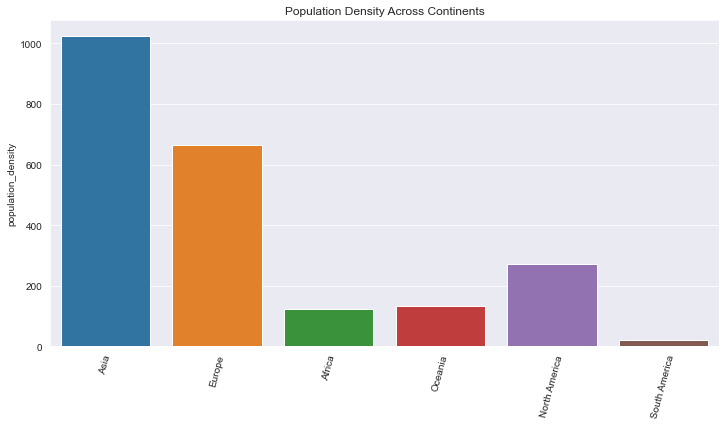

In [20]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Population Density Across Continents')
sns.barplot(x=continent_population_density_df.index, y=continent_population_density_df['population_density']);



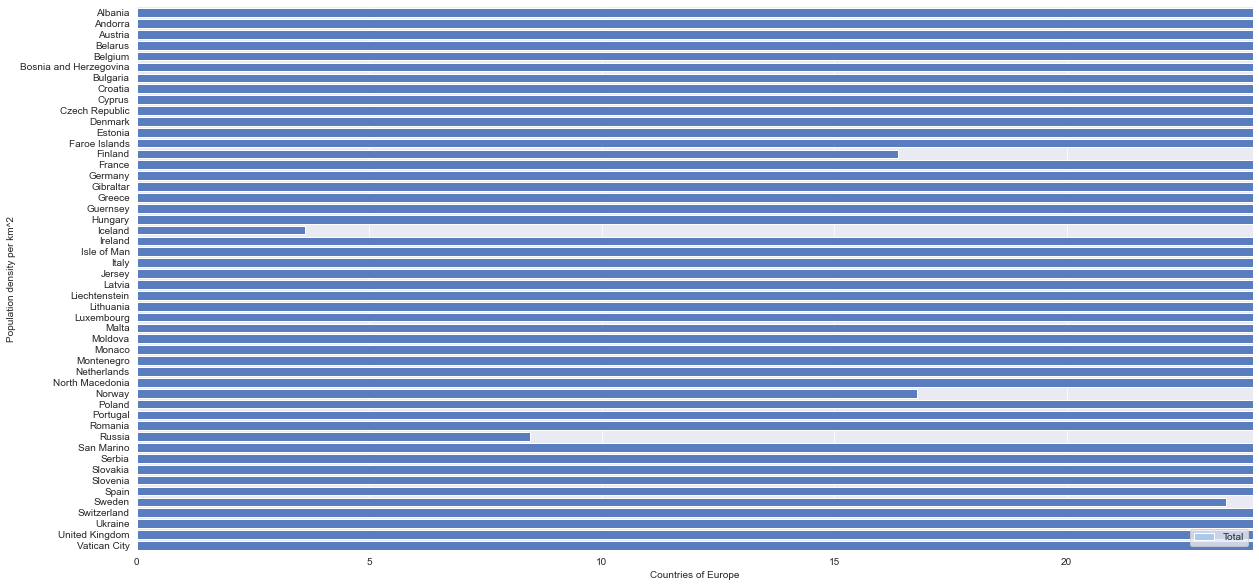

In [21]:

f, ax = plt.subplots(figsize=(20, 10))

europe = europe_countries_pop_dense_df

sns.set_color_codes("pastel")
sns.barplot(x='population_density', y=europe_countries_pop_dense_df.index, data=europe,
            label="Total", color="b")

sns.set_color_codes("muted")
sns.barplot(x='population_density', y=europe_countries_pop_dense_df.index, data=europe,
            label="", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="Population density per km^2",
       xlabel="Countries of Europe")
sns.despine(left=True, bottom=True)



In [49]:
# In world_population_df, change the name of the column "density_(per_km²)" to "population_density"
world_population_df.rename(columns={'density_(per_km²)': 'population_density'}, inplace=True)

/var/folders/wx/x69ggs7s5cgd2gw98rpcp8bm0000gn/T/ipykernel_91138/2161907667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_population_df.rename(columns={'density_(per_km²)': 'population_density'}, inplace=True)


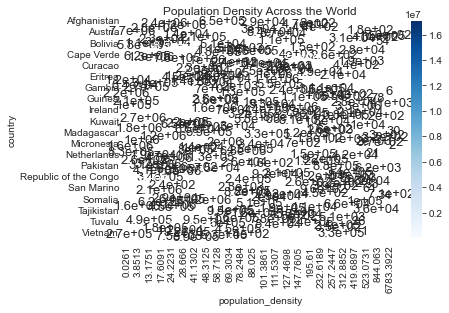

In [90]:
# Load the example flights dataset as a matrix
world = world_population_df.pivot("country", "population_density", "area_(km²)")

# Chart Title
plt.title("Population Density Across the World")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(world,

            annot=True,
            linewidths=.5,
            cmap='Blues',
            annot_kws={"fontsize":13});


In [91]:
world_population_df.sample(10)

,rank,country,capital,continent,2022_population,area_(km²),population_density,growth_rate,world_population_percentage
176,220,Saint Martin,Marigot,North America,31791,53,599.8302,0.9951,0.00
98,98,Israel,Jerusalem,Asia,9038309,20770,435.1617,1.0155,0.11
157,222,Palau,Ngerulmud,Oceania,18055,459,39.3355,1.0017,0.00
161,109,Paraguay,Asunción,South America,6780744,406752,16.6705,1.0115,0.09
214,111,Turkmenistan,Ashgabat,Asia,6430770,488100,13.1751,1.0140,0.08
191,166,Solomon Islands,Honiara,Oceania,724273,28896,25.0648,1.0232,0.01
0,36,Afghanistan,Kabul,Asia,41128771,652230,63.0587,1.0257,0.52
25,137,Bosnia and Herzegovina,Sarajevo,Europe,3233526,51209,63.1437,0.9886,0.04
165,92,Portugal,Lisbon,Europe,10270865,92090,111.5307,0.9981,0.13
226,234,Vatican City,Vatican City,Europe,510,1,510.0000,0.9980,0.00


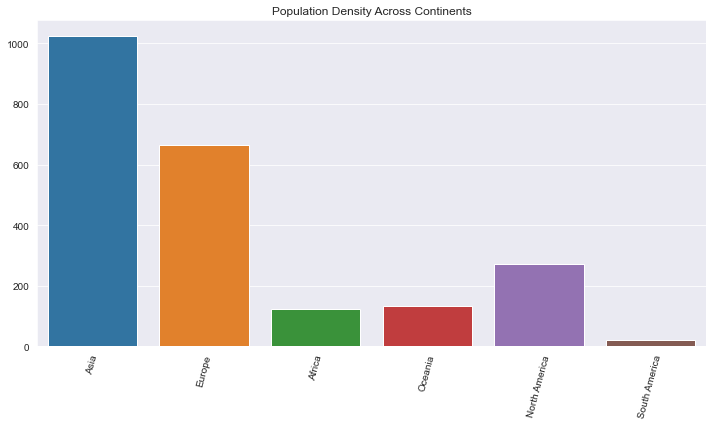

In [92]:
continents = list(continent_population_density.keys())
population_density_continents = list(continent_population_density.values())

plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Population Density Across Continents')
sns.barplot(x=continents, y=population_density_continents);

In [93]:
europe_population_densities = {
    row['country']: row['population_density']
    for index, row in world_population_df[world_population_df['continent'] == 'Europe'].iterrows()
}

In [94]:
euro_countries


['Albania',
 'Andorra',
 'Austria',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Faroe Islands',
 'Finland',
 'France',
 'Germany',
 'Gibraltar',
 'Greece',
 'Guernsey',
 'Hungary',
 'Iceland',
 'Ireland',
 'Isle of Man',
 'Italy',
 'Jersey',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Moldova',
 'Monaco',
 'Montenegro',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'San Marino',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Ukraine',
 'United Kingdom',
 'Vatican City']

In [95]:
euro_densities

[98.8702,
 170.5641,
 106.5877,
 45.9295,
 381.8111,
 63.1437,
 61.1654,
 71.2153,
 135.2814,
 133.0627,
 136.4984,
 29.3201,
 38.112,
 16.3722,
 117.1419,
 233.4544,
 5441.5,
 78.68,
 811.5513,
 107.1431,
 3.6204,
 71.4799,
 147.7605,
 195.9191,
 954.9828,
 28.666,
 245.7937,
 42.1142,
 250.425,
 1687.6139,
 96.7026,
 18234.5,
 45.4012,
 419.6897,
 81.4218,
 16.7828,
 127.4698,
 111.5307,
 82.4665,
 8.4636,
 551.8033,
 81.7257,
 115.0856,
 104.5649,
 93.9909,
 23.4276,
 211.7157,
 65.7858,
 277.9289,
 510.0]

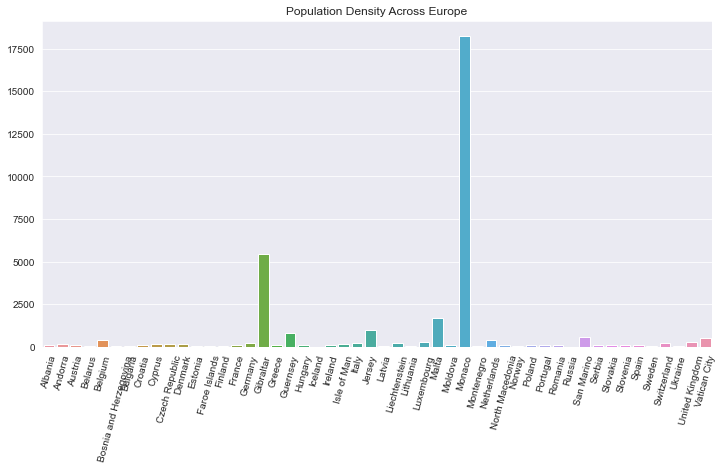

In [96]:
euro_countries = list(europe_population_densities.keys())
euro_densities = list(europe_population_densities.values())

plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Population Density Across Europe')
sns.barplot(x=euro_countries, y=euro_densities);

In [102]:
continents = list[continent_population_density.keys()]
continent_density = list[continent_population_density.values()]

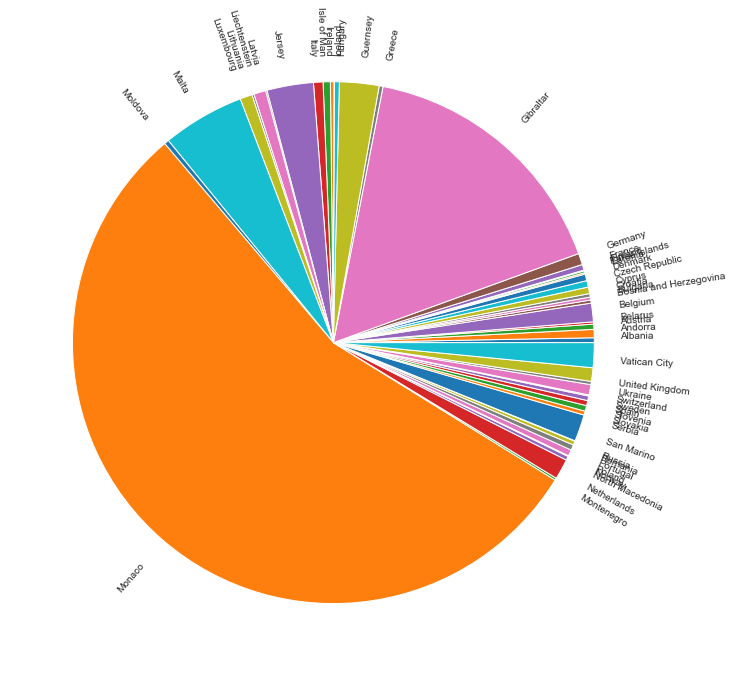

In [115]:
plt.figure(figsize=(12,12))
plt.pie(europe_population_densities.values(), labels=europe_population_densities.keys(), rotatelabels=True);


In [116]:
# Create a dataframe for the countries of asia
asia_df = world_population_df[world_population_df['continent'] == 'Asia']

<BarContainer object of 50 artists>

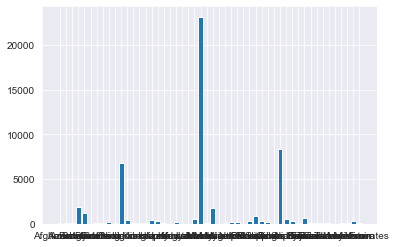

In [119]:
# Create a bar chart of the population density of the countries in asia
plt.bar(asia_df['country'], asia_df['population_density'])

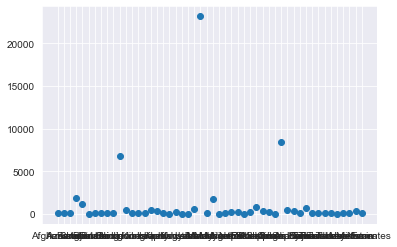

In [121]:
# Create a scatterplot of the countries of asia and their population density
plt.scatter(asia_df['country'], asia_df['population_density'])